# TASK-3
### To Explore Unsupervised Machine Learning

<img src="https://media-exp1.licdn.com/dms/image/C560BAQFgHU3sTF4LfQ/company-logo_200_200/0?e=2159024400&v=beta&t=t-cy2njTNbqc_h3kW92SYNTec2pIhYMW6WtzJ9WDd-I">

**From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.**

**Importing necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading data**

In [2]:
data = pd.read_csv('data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**dropping the labels column**

In [3]:
X = data.drop(['Species'],axis=1)
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


**converting dataframe into numpy array**

In [4]:
X = np.array(X)

### As we are not specified about the no. of clusters, we will go on to get the no. of optimum clusters ourselves by plotting no. of clusters vs Inertia

In [5]:
from sklearn.cluster import KMeans

In [6]:
memory = []

In [7]:
for i in range(1,10):
    clf = KMeans(n_clusters=i,random_state=0)
    clf.fit(X)
    memory.append(clf.inertia_)

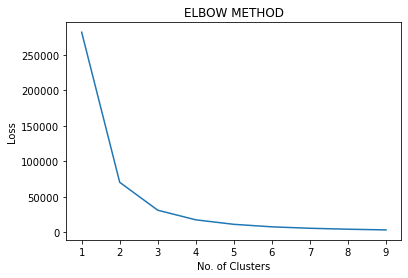

In [8]:
plt.plot(range(1,10),memory)
plt.title("ELBOW METHOD")
plt.xlabel('No. of Clusters')
plt.ylabel('Loss')
plt.show()

**We choose 3 as the optimum no. of clusters according to the Elbow method**

In [9]:
clf = KMeans(n_clusters=3,random_state=0)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [10]:
Y = clf.labels_
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Visualising data**

- we have 4 features but we will plot only against sepal-length vs sepal-width

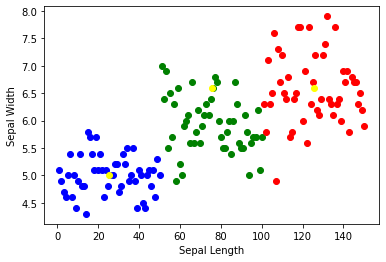

In [11]:
G = clf.cluster_centers_
color = ['red','blue','green']
for i in range(len(Y)):
    plt.scatter(X[i][0],X[i][1],c = color[Y[i]])
    
#plotting  centers
plt.scatter(G[0][0],G[0][1],color='yellow')
plt.scatter(G[1][0],G[1][1],color='yellow')
plt.scatter(G[2][0],G[0][1],color='yellow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

- blue   : Iris-setosa
- green  : Iris-versicolor
- red    : Iris-virginica
- yellow : Cluster Centroids